# Imports

In [1]:
# Bibliotheken für Datenmanipulation
import pandas as pd
import numpy as np

# Bibliotheken für Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotheken für statistische Analysen
from scipy.stats import pearsonr
import scipy.stats as scs
import pingouin as pg

# Import dataframe

Mit dem Beispiel-Datensatz "tips" sollen der Pearson und der unabhängige T-Test in Python erörtert werden.

In [2]:
df = pd.read_csv("F:/Alfatraining/Statistik mit R/Projektarbeit_GruppeC/tips.csv")

# Pearson (Korrelation)

## Konzept

Die Korrelation, auch bivariate Korrelation oder Produkt-Moment-Korrelation genannt, beschreibt den Zusammenhang von zwei intervallskalierten Merkmalen/Variablen einer Zufallsstichprobe. Eine Möglichkeit, die Stärke des Zusammenhangs zu bestimmen, ist die Berechnung des Korrelationskoeffizienten r nach Bravais und Pearson. Voraussetzung ist hierbei, dass es sich um einen linearen Zusammenhang zwischen den analysierten Merkmalen handelt. Zusätzlich wird hier ein ungerichteter Zusammenhang untersucht, d.h. die Variablen sind unabhängig voneinander und folglich werden keine kausalen Aussagen gemacht.

Der Korrelationskoeffizient r kann Werte zwischen -1 und +1 annehmen und ist unabhängig von der Maßeinheit. Ein Wert von -1 beschreibt eine perfekt negative Korrelation und ein Wert von +1 eine perfekt positive Korrelation. Bei r = 0 liegt kein linearer Zusammenhang zwischen den Variablen vor.

### Scheinkorrelation
Es besteht das Risiko einer Scheinkorrelation. Scheinkorrelation bezeichnet eine Korrelation zwischen zwei Variablen ohne Kausalzusammenhang. Das heißt es liegt nur eine zufällige oder indirekte Beziehung zwischen den Variablen vor.

#### Beispiele
+ Anzahl der Störche und Geburten in Deutschland.
+ Anzahl der Mathedoktoren und Menge des gelagerten Urans in Amerika.

## Hypothese
H1: Es gibt einen Zusammenhang zwischen Trinkgeld und der Gesamtrechnung.

H0: Es gibt keinen Zusammenhang zwischen Trinkgeld und der Gesamtrechnung.


## Deskriptive Statistik

In [3]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,244.0,121.500000,70.580923,0.00,60.7500,121.500,182.2500,243.00
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In der Abbildung können die Mittelwerte und Standardabweichungen der Variablen Trinkgeld (tip) und Gesamtrechnung (total_bill) abgelesen werden. Im Mittel liegt das Trinkgeld bei 3.00 Euro (SD = 1.38,n=244)). Die Gesamtrechnung liegt durchschnittlich bei 19.79 Euro (SD = 8.90, n=244).

## Voraussetzungen
Die Variablen sind mindestens intervallskaliert --> das Trinkeld und die Gesamtrechnung sind metrisch und damit mindestens intervallskaliert.

Die Variablen sind normalverteilt (n>30) und Histogram

Der untersuchte Zusammenhang zwischen den Variablen muss linear sein -> Scatterplot

### Normalverteilung

#### Histogram

C:\Users\Blaschko\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


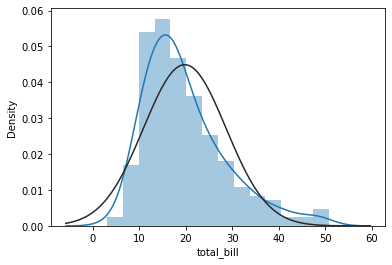

In [6]:
from scipy.stats import norm
ax = sns.distplot(df.total_bill, fit=norm, kde=True);

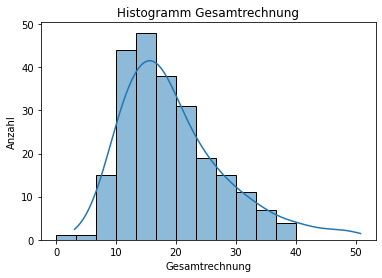

In [7]:
ax = sns.histplot(df.total_bill, binrange = (0,40), kde = True,
             bins = 12)
ax.set_title("Histogramm Gesamtrechnung")
ax.set_ylabel('Anzahl')
ax.set_xlabel('Gesamtrechnung');

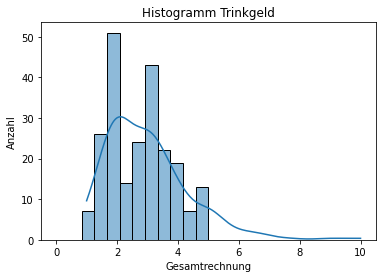

In [8]:
ax = sns.histplot(df.tip, binrange = (0,5), kde = True,
             bins = 12)
ax.set_title("Histogramm Trinkgeld")
ax.set_ylabel('Anzahl')
ax.set_xlabel('Gesamtrechnung');

In den Histogrammen kann man sehen das beide Variablen annähernd normalverteilt sind. Außerdem ist die Anzahl größer als 30. Somit kann von einer Normalverteilung ausgegangen werden.

## Veranschaulichung des Zusammenhangs

### Streudiagramm 

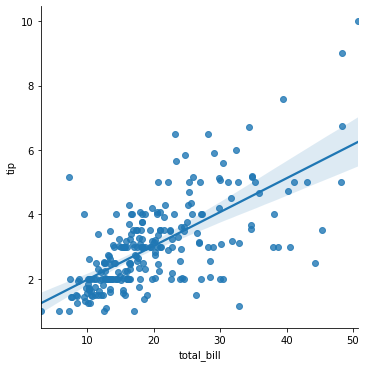

In [9]:
ax = sns.lmplot(x="total_bill",y="tip", data=df);

Das Streudiagramm in der Abbildung zeigt eine tendenziell positive lineare Beziehung zwischen den beiden Variablen. Das heisst, die beiden Variablen korrelieren vermutlich. Da die Korrelationsanalyse einen ungerichteten Zusammenhang untersucht, lässt er sich auf zwei Weisen ausformulieren: Je höher das Trinkgeld, desto höher ist die Gesamtrechnung, oder je höher die Gesamtrechnung, desto höher ist das Trinkgeld.

## Korrelationsanalyse (Pearson)

### Scipy

In [10]:
corr, p_value = pearsonr(df.total_bill, df.tip)

In [11]:
corr

0.6757341092113645

In [12]:
p_value

6.692470646863477e-34

### Pingouin

In [13]:
pg.corr(df.total_bill, df.tip)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,244,0.675734,"[0.6, 0.74]",0.456617,0.452107,6.692471e-34,4.952e+30,1.0


Der Output von Scipy und Pingouin gibt den Korrelationskoeffizienten sowie den p-Wert (Signifikanz) und die Stichprobengrösse n wieder. Es wird ersichtlich, dass ein Zusammenhang vorliegt zwischen dem Trinkgeld und der Gesamtrechnung (r = 0.6757341 , p < 2.2e-16, n = 244). Da r einen positiven Wert aufweist, kann von einem positiven linearen und signifikanten Zusammenhang zwischen dem Trinkgeld und der Gesamtrechnung ausgegangen werden. Das bedeutet: Je höher die Gesamtrechnung, desto höher das Trinkgeld oder je höher das Trinkgeld, desto höher die Gesamtrechnung.

## Bestimmtheitsmaß

In [14]:
bestimmt = corr**2*100
print("Das Bestimmtheitsmaß liegt bei {} Prozent".format(round(bestimmt, 2)))

Das Bestimmtheitsmaß liegt bei 45.66 Prozent


Das Bestimmtheitsmaß gibt an, welcher Anteil der Varianz in beiden Variablen durch gemeinsame Varianzanteile determiniert wird. Für das vorliegende Beispiel beträgt der Anteil der gemeinsamen Varianz 45.66 %.

## Effektstärke

In [15]:
print("Die Effektstärke liegt bei {}".format(round(corr, 2)))

Die Effektstärke liegt bei 0.68


Um die Bedeutsamkeit eines Ergebnisses zu beurteilen, werden Effektstärken berechnet. Im Beispiel ist die Korrelation der beiden Variablen signifikant, doch es stellt sich die Frage, ob der Zusammenhang gross genug ist, um ihn als bedeutend einzustufen. Der Korrelationskoeffizient r von Bravais-Pearson stellt selbst ein Mass für die Effektstärke dar.

Um zu bestimmen, wie gross der gefundene Zusammenhang ist, kann man sich an der Einteilung von Cohen (1992) orientieren:


$$
\begin{align}
\text{Schwacher Effekt: } 0.10 &< ||r|| < 0.30             \\
\text{Schwacher bis mittlerer Effekt: } 0.30 &= ||r||      \\
\text{Mittlerer Effekt: } 0.30 &< ||r|| < 0.50             \\
\text{Mittlerer bis starker Effekt: }0.50 &= ||r||         \\
\text{Starker Effekt: } 0.50 &< ||r||        
\end{align}
$$


Damit entspricht ein Korrelationskoeffizient(r) von 0.6757 einem starken Effekt.

## Aussage (Pearson)

Das Trinkgeld und die Gesamtrechnung korrelieren positiv signifikant (r = 0.6757341, p < 2.2e-16, n = 244). Daher kann man sagen je höher die Gesamtrechnung, desto höher das Trinkgeld oder je höher das Trinkgeld, desto höher die Gesamtrechnung. 45.66 % der Streuung der gemeinsamen Varianz kann durch das Trinkgeld und die Gesamtrechnung  erklärt werden. Mit einer Effektstärke von 0.68 handelt es sich nach Cohen (1992) um einen starken Effekt. Die H0 kann verworfen werden.

# T-Test für unabhängige Variablen

In [4]:
tips = pd.read_csv('tips.csv')

In [4]:
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe(include="all")

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,NaN,157,151,87,176,NaN
mean,121.500000,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,70.580923,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,0.000000,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,60.750000,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,121.500000,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,182.250000,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## Hypothese 

**ungerichtete Hypothese**

H1: Es gibt einen Unterschied zwischen dem Trinkgeld von Männern und Frauen. 
$M_{M} \ne M_{F}$

H0: Es gibt keinen Unterschied zwischen dem Trinkgeld von Männern und Frauen.
$M_{M} = M_{F}$

## Voraussetzungen des t-Tests für unabhängige Stichproben

- Die abhängige Variable ist min. intervallskaliert -> tip(AV)

- Es liegt eine unabhängige Variable vor, mittels der die beiden zu vergleichenden Gruppen gebildet werden. -> Ja, Frauen und Männer (sex)

- Das untersuchte Merkmal ist in den Grundgesamtheiten der beiden Gruppen normalverteilt -> siehe Histogramm

- Homogenität der Varianzen: Die Gruppen kommen aus Grundgesamtheiten mit annähernd identischer Varianz -> siehe Levene-Test

- Die einzelnen Messwerte sind voneinander unabhängig (das Verhalten einer Versuchsperson hat keinen Einfluss auf das Verhalten einer anderen) -> ist gegeben

### Prüfung der Normalverteilung mithilfe des Histogramms


Text(0.5, 1.0, 'Histogramm Trinkgeld Männer')

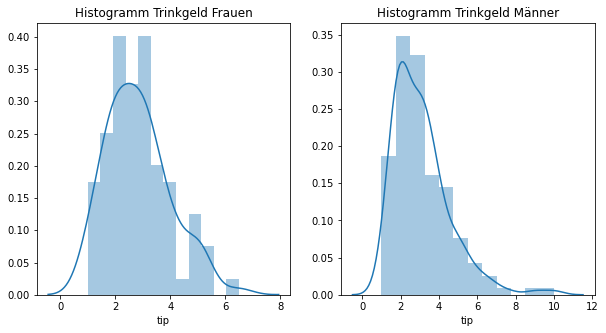

In [27]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(tips[tips["sex"]== "Female"]["tip"],bins = 12, ax=axes[0]).set_title("Histogramm Trinkgeld Frauen")
sns.distplot(tips[tips["sex"]== "Male"]["tip"],bins = 12,ax=axes[1]).set_title("Histogramm Trinkgeld Männer")

Die Daten sind normalverteilt, wenn auch nicht perfekt. Siehe auch QQplot. Auf Grund der Größe der Stichprobe (n=244), kann von Normalverteilung ausgegangen werden.

**QQPlot als Alternative:**

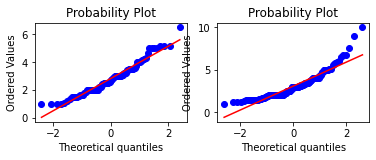

In [16]:
plt.subplot(221)
ss.probplot(tips[tips["sex"]== "Female"]["tip"], dist="norm", plot=plt)
plt.subplot(222)
ss.probplot(tips[tips["sex"]== "Male"]["tip"], dist="norm", plot=plt)

plt.show()

### Ausreißer-Analyse

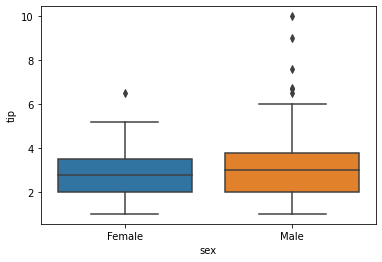

In [8]:
sns.boxplot(y="tip", x="sex",
            data=tips)

Wenige Ausreißer vorhanden, siehe auch Deskriptive.

## Grundlegende Konzepte: Was ist t-Test für unabhängige Stichproben?

Der t-Test für unabhängige Stichproben testet, ob die Mittelwerte zweier unabhängiger Stichproben verschieden sind.

Die Fragestellung des t-Tests für unabhängige Stichproben wird oft so verkürzt:
"Unterscheiden sich die Mittelwerte zweier unabhängiger Stichproben?" 

## Deskriptive Statistiken

In [25]:
print (tips.groupby("sex").describe()["tip"])

        count      mean       std  min  25%   50%   75%   max
sex                                                          
Female   87.0  2.833448  1.159495  1.0  2.0  2.75  3.50   6.5
Male    157.0  3.089618  1.489102  1.0  2.0  3.00  3.76  10.0


Es zeigt sich für diese Fragestellung kein erheblicher Mittelwertsunterschied. Das Trinkgeld von Männern ist nur leicht höher (M = 3.09, SD = 1.49, n = 157) als bei Frauen (M = 2.83, SD = 1.16, n = 87). Mean und Median liegen bei beiden Gruppen nah beeinander, was darauf schließen lässt, dass keine Ausreißer die Verteilung verzerren.

## Test auf Varianzhomogenität (Levene-Test)

Der t-Test für unabhängige Gruppen setzt Varianzhomogenität voraus. Liegt Varianzheterogenität vor (also unterschiedliche Varianzen), so müssen unter anderem die Freiheitsgerade des t-Wertes angepasst werden. Ob die Varianzen nun homogen (“gleich”) sind, lässt sich mit dem Levene-Test auf Varianzhomogenität prüfen.

Der Levene-Test verwendet die Nullhypothese, dass sich die beiden Varianzen nicht unterscheiden. Daher bedeutet ein nicht signifikantes Ergebnis, dass sich die Varianzen nicht unterscheiden und also Varianzhomogenität vorliegt. Ist der Test signifikant, so wird von Varianzheterogenität ausgegangen.

In [37]:
pg.homoscedasticity(tips, dv="tip", group="sex")  #nutzt Median

,W,pval,equal_var
levene,1.990971,0.159524,True


In [43]:
#scipy modul nutzen um mean zu nehmen

scs.levene(tips[tips["sex"]== "Female"]["tip"],tips[tips["sex"]== "Male"]["tip"],center="mean")

LeveneResult(statistic=2.357211366999719, pvalue=0.1260112815339025)

Es ist zu erkennen, das Varianzhomogenität vorliegt, da der Levene-Test nicht signifikant ist. Daher können wir von gleichen Varianzen ausgehen (F(1, 242) = 2.3572, p = .126). Es ist daher nicht notwendig eine Welch-Korrektur durchzuführen.

## Ergebnisse des t-Tests für unabhängige Stichproben

**ungerichtete Hypothese**

In [41]:
pg.ttest(tips[tips["sex"]== "Female"]["tip"],tips[tips["sex"]== "Male"]["tip"],tail="two-sided", correction = False )

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-1.38786,242,two-sided,0.166456,"[-0.62, 0.11]",0.185494,0.361,0.282179


Die Teststatistik zeigt keinen signifikanten Unterschied (t(242) = -1.3879, p= 0.1665, n=244):

Die Mittelwerte der beiden Geschlechter unterscheiden sich nicht.

## Berechnung der Effektstärke

**Bei ungleich großen Gruppen: Cohen's d**

Cohen's d beträgt 0.185. Es handelt sich dabei um keinen Effekt.

## Aussage (T-Test für unabhängige Variablen)

Es gibt keinen Unterschied zwischen den durchschnittlichen Trinkgeldern von Frauen  (M = 2.83, SD = 1.16, n = 87) und Männern (M = 3.09, SD = 1.49, n = 157), (t(242) = -1.3879, p= 0.1665, n=244)). Die Effektstärke liegt bei r = 0.185 und entspricht damit keinem Effekt nach Cohen (1992). H0 kann nicht verworfen werden.